In [18]:
students_p = pd.read_csv('../data/02_intermidiate.csv', delimiter = ',') 
students_p.head(5)

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


## Histogramas y gráficas

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Histograma de las asignaturas

ValueError: Could not interpret value `math_score` for parameter `x`

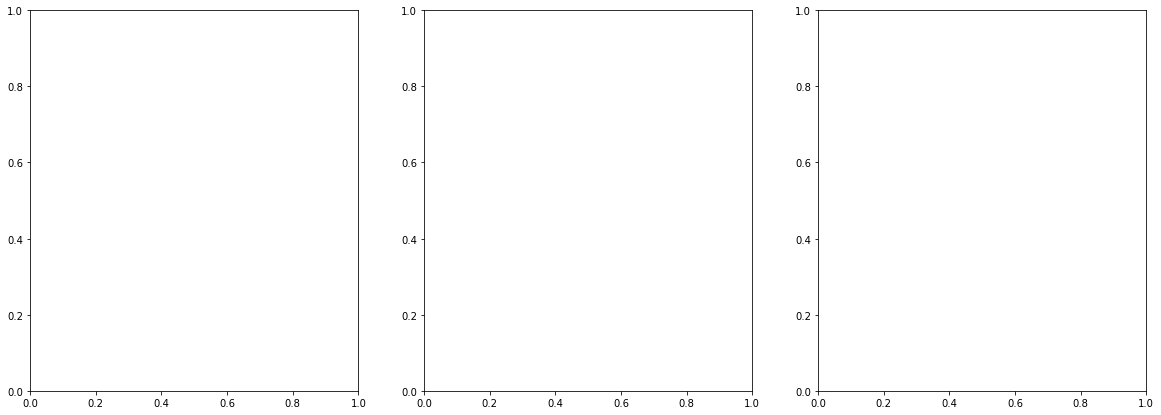

In [19]:
figura, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,7))
sns.histplot(students_p, ax=ax1, x="math_score", color = 'blue')
sns.histplot(students_p, ax=ax2, x="reading_score", color = 'orange')
sns.histplot(students_p, ax=ax3, x="writing_score", color = 'red')

### Distribución de las notas

In [ ]:
# En matemáticas
print(students_p['math_score'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(students_p['math_score'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
# En comprensión lectora
print(students_p['reading_score'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(students_p['reading_score'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
# En expresión escrita
print(students_p['writing_score'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(students_p['writing_score'], color='g', bins=100, hist_kws={'alpha': 0.4});

### Ánalisis de la asimetría de las asignaturas

In [ ]:
sns.distplot(students_p['math_score'])

In [ ]:
sns.distplot(students_p['reading_score'])

In [ ]:
sns.distplot(students_p['writing_score'])

### Distribución numérica del dataset

In [ ]:
list(set(students_p.dtypes.tolist()))
students_p_num = students_p.select_dtypes(include = ['float64', 'int64'])
students_p_num.head()

### Análisis bivariante entre asignaturas

In [ ]:
figura, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25,10))
students_p.plot.scatter(ax = ax1, x="math_score",y="reading_score")
students_p.plot.scatter(ax = ax2, x="math_score",y="writing_score")
students_p.plot.scatter(ax = ax3, x="reading_score",y="writing_score")

In [ ]:
sns.pairplot(data = students_p, vars=['math_score','reading_score','writing_score'])
plt.show()

### Examenes realizados por género

In [ ]:
examenes_por_genero = students_p.groupby(['gender']).gender.agg(['count']).reset_index()
examenes_por_genero

In [ ]:
figura, (ax1) = plt.subplots(1, figsize = (15, 5))
examenes_por_genero.plot(ax=ax1, kind = 'bar', color= ("cyan"), title = 'Examenes realizados por hombres y mujeres', grid = True)
ax1.set_xlabel('Sexo')
ax1.set_ylabel('Nº de examenes')
plt.legend()
ax1.set_xticklabels(examenes_por_genero.gender)

### Media de las asignaturas por género

In [ ]:
media_asignaturas_por_genero = students_p[["gender","math_score","reading_score","writing_score"]].groupby('gender').mean()
media_asignaturas_por_genero

In [ ]:
media_asignaturas_por_genero.unstack().plot(kind = 'bar', color='orange', grid = True, title = 'Media de las asignaturas por género')

In [ ]:
figura, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,7))
sns.histplot(students_p, ax=ax1, x="math_score", hue="gender")
sns.histplot(students_p, ax=ax2, x="reading_score", hue="gender")
sns.histplot(students_p, ax=ax3, x="writing_score", hue="gender")

### Boxplots género y asignaturas

In [ ]:
figura, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25,10))
sns.boxplot(ax= ax1, x = students_p.gender, y  = students_p.math_score)
sns.boxplot(ax = ax2, x = students_p.gender, y  = students_p.reading_score)
sns.boxplot(ax= ax3, x = students_p.gender, y  = students_p.writing_score)

### Suspensos y Aprobados de cada asignatura

In [ ]:
students_p['resultados_mates'] = np.where(students_p['math_score'] < 50, 'suspendida', 'aprobada')
students_p['resultados_reading'] = np.where(students_p['reading_score'] < 50, 'suspendida', 'aprobada')
students_p['resultados_writing'] = np.where(students_p['writing_score'] < 50, 'suspendida', 'aprobada')

In [ ]:
resultado_mates = students_p['resultados_mates'].value_counts()
print(resultado_mates)
resultado_reading = students_p['resultados_reading'].value_counts()
print(resultado_reading)
resultado_writing = students_p['resultados_writing'].value_counts()
print(resultado_writing)

In [ ]:
figura, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,5))

students_p['resultados_mates'].value_counts(dropna = False).plot(ax=ax1, kind= 'bar', color = 'blue', 
                                                                 title = 'Resultados en matemáticas', grid = True)

ax1.set_xlabel('resultado')
ax1.set_ylabel('Nº alumnos');

students_p['resultados_reading'].value_counts(dropna = False).plot(ax=ax2, kind= 'bar', color = 'orange', 
                                                                   title = 'Resultados en comprensión lectora', grid = True)

ax2.set_xlabel('resultado')
ax2.set_ylabel('Nº alumnos');

students_p['resultados_writing'].value_counts(dropna = False).plot(ax=ax3,kind= 'bar', color = 'red', 
                                                                   title= 'Resultados en expresión esccrita', grid = True)

ax3.set_xlabel('resultado')
ax3.set_ylabel('Nº alumnos');

### Aprobados y Suspensos por género

In [ ]:
resultados_mates_genero = students_p.iloc[:,[0,6]]
resultados_mates_genero = pd.DataFrame(resultados_mates_genero.groupby(['gender']).resultados_mates.value_counts())

resultados_reading_genero = students_p.iloc[:,[0,7]]
resultados_reading_genero = pd.DataFrame(resultados_reading_genero.groupby(['gender']).resultados_reading.value_counts())

resultados_writing_genero = students_p.iloc[:,[0,8]]
resultados_writing_genero = pd.DataFrame(resultados_writing_genero.groupby(['gender']).resultados_writing.value_counts())

In [ ]:
figura, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25,10))

resultados_mates_genero.unstack().plot(ax = ax1, kind = 'bar', color='blue', edgecolor = 'black', grid = True,
                                      title = 'Resultados en matemáticas por género');

resultados_reading_genero.unstack().plot(ax = ax2, kind = 'bar', color='orange', edgecolor = 'black', grid = True,
                                        title = 'Resultados en comprensión lectora por género');

resultados_writing_genero.unstack().plot(ax = ax3, kind = 'bar', color='red', edgecolor = 'black', grid = True,
                                        title = 'Resultados en writing por genero' );

In [ ]:
print(resultados_mates_genero)
print(resultados_reading_genero)
print(resultados_writing_genero)

### Media de las asignaturas por etnia

In [ ]:
media_asignaturas_por_etnia = students_p[["race","math_score","reading_score","writing_score"]].groupby('race').mean()
media_asignaturas_por_etnia

In [ ]:
figura, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,7))
sns.histplot(students_p, ax=ax1, x="math_score", hue="race")
sns.histplot(students_p, ax=ax2, x="reading_score", hue="race")
sns.histplot(students_p, ax=ax3, x="writing_score", hue="race")

In [ ]:
media_asignaturas_por_etnia.plot(kind = 'bar', color='lightblue', edgecolor = 'black', figsize=(15,5), grid = True, title= 'Media de las asignaturas por etnia')

### Boxplots asignaturas y etnia

In [ ]:
figura, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25,10))
sns.boxplot(ax= ax1, x = students_p.race, y  = students_p.math_score)
sns.boxplot(ax = ax2, x = students_p.race, y  = students_p.reading_score)
sns.boxplot(ax= ax3, x = students_p.race, y  = students_p.writing_score)

### Suspensos por etnia

In [ ]:
resultados_mates_etnia = students_p.iloc[:,[1,6]]
resultados_mates_etnia = pd.DataFrame(resultados_mates_etnia.groupby(['race']).resultados_mates.value_counts())

resultados_reading_etnia = students_p.iloc[:,[1,7]]
resultados_reading_etnia = pd.DataFrame(resultados_reading_etnia.groupby(['race']).resultados_reading.value_counts())

resultados_writing_etnia = students_p.iloc[:,[1,8]]
resultados_writing_etnia = pd.DataFrame(resultados_writing_etnia.groupby(['race']).resultados_writing.value_counts())

In [ ]:
figura, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (27,10))

resultados_mates_etnia.unstack().plot(ax = ax1,kind = 'bar', color='lightblue', edgecolor = 'black', grid = True,
                                       title= 'Media de matemáticas por etnia');

resultados_reading_etnia.unstack().plot(ax = ax2, kind = 'bar', color='lightyellow', edgecolor = 'black',  
                                        grid = True, title= 'Media de comprensión lectora por etnia');

resultados_writing_etnia.unstack().plot(ax = ax3, kind = 'bar', color='darkred', edgecolor = 'black', 
                                        grid = True, title= 'Media de writing por etnia');

In [ ]:
print(resultados_mates_etnia)
print(resultados_reading_etnia)
print(resultados_writing_etnia)